In [77]:
import darts
import glob
from darts.datasets import AirPassengersDataset

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from darts import TimeSeries

import tensorflow as tf
tf.compat.v1.enable_eager_execution()

from tensorflow.keras.layers import MaxPool1D

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [78]:
df = AirPassengersDataset().load().pd_dataframe()
df

component,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [79]:
df['Month'] = df.index
df.rename(columns= {'#Passengers': 'Passenger'}, inplace= True)
df

component,Passenger,Month
Month,,
1949-01-01,112.0,1949-01-01
1949-02-01,118.0,1949-02-01
1949-03-01,132.0,1949-03-01
1949-04-01,129.0,1949-04-01
1949-05-01,121.0,1949-05-01
...,...,...
1960-08-01,606.0,1960-08-01
1960-09-01,508.0,1960-09-01
1960-10-01,461.0,1960-10-01


<Axes: xlabel='Month'>

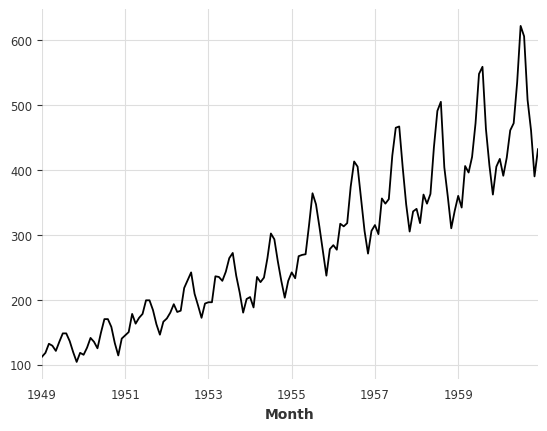

In [80]:
df['Passenger'].plot()

<Axes: xlabel='Month'>

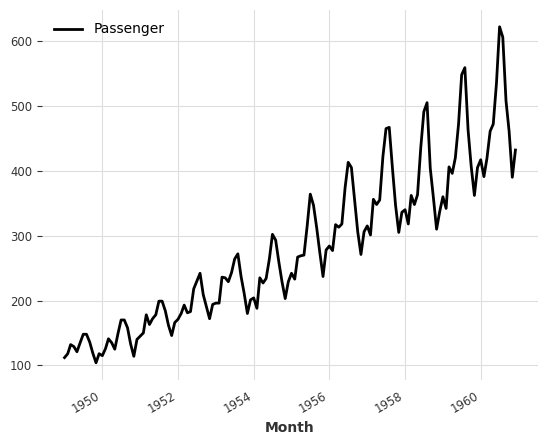

In [81]:
series = TimeSeries.from_dataframe(df, time_col='Month')
series.plot()

<Axes: xlabel='Month'>

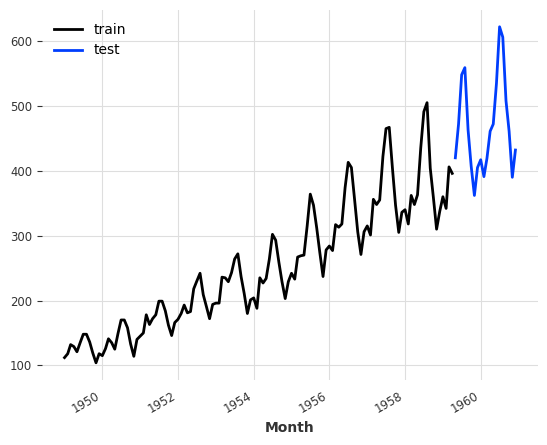

In [82]:
train, test = series[:-20], series[-20:]

train.plot(label='train')
test.plot(label='test')

In [83]:
from darts.models.forecasting.baselines import NaiveSeasonal

naive_seasonal = NaiveSeasonal(K=10)
naive_seasonal.fit(train)

pred_naive = naive_seasonal.predict(20)

In [93]:
test, pred_naive

(<TimeSeries (DataArray) (Month: 20, component: 1, sample: 1)>
 array([[[420.]],
 
        [[472.]],
 
        [[548.]],
 
        [[559.]],
 
        [[463.]],
 
        [[407.]],
 
        [[362.]],
 
        [[405.]],
 
        [[417.]],
 
        [[391.]],
 
        [[419.]],
 
        [[461.]],
 
        [[472.]],
 
        [[535.]],
 
        [[622.]],
 
        [[606.]],
 
        [[508.]],
 
        [[461.]],
 
        [[390.]],
 
        [[432.]]])
 Coordinates:
   * Month      (Month) datetime64[ns] 1959-05-01 1959-06-01 ... 1960-12-01
   * component  (component) object 'Passenger'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None,
 <TimeSeries (DataArray) (Month: 20, component: 1, sample: 1)>
 array([[[491.]],
 
        [[505.]],
 
        [[404.]],
 
        [[359.]],
 
        [[310.]],
 
        [[337.]],
 
        [[360.]],
 
        [[342.]],
 
        [[406.]],
 
        [[396.]],
 
        [[491.]],
 
    

<Axes: xlabel='Month'>

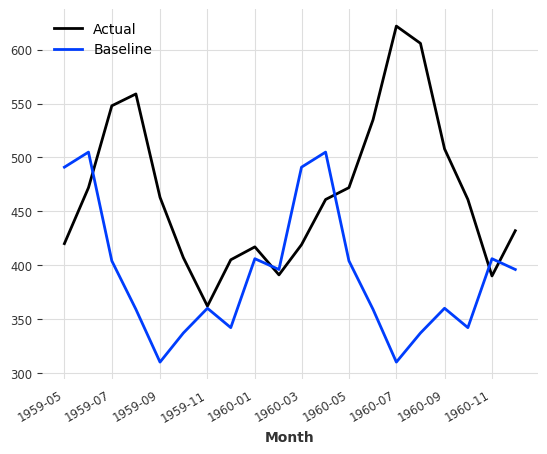

In [85]:
test.plot(label='Actual')
pred_naive.plot(label='Baseline')

In [96]:
from darts.datasets import WeatherDataset

df_weather = WeatherDataset().load().pd_dataframe()
df_weather.head()

component,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
Date Time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,5.49,...,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,428.1
2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,5.45,...,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,428.0
2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,5.43,...,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,427.6
2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,5.37,...,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,430.0
2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,5.42,...,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,432.2


In [97]:
df_weather.shape

(52704, 21)

In [98]:
from darts.models import NBEATSModel

series = WeatherDataset().load()

# predicting atmospheric pressure
target = series['p (mbar)'][:100]

# optionally, use past observed rainfall (pretending to be unknown beyond index 100)
past_cov = series['rain (mm)'][:100]

# changing the activation function of the encoder/decoder to LeakyReLU
model = NBEATSModel(
    input_chunk_length=6,
    output_chunk_length=6,
    n_epochs=5,
    activation='LeakyReLU'
)


model.fit(target, past_covariates=past_cov)
pred = model.predict(6)
pred.values()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.1 M 
---------------------------------------------------
6.1 M     Trainable params
1.4 K     Non-trainable params
6.1 M     Total params
24.410    Total estimated model params size (MB)


Epoch 4: 100%|██████████| 3/3 [00:00<00:00,  7.09it/s, train_loss=1.15e+4]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 3/3 [00:00<00:00,  7.06it/s, train_loss=1.15e+4]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 66.86it/s]


array([[ 918.29673709],
       [1030.67922207],
       [ 957.89142752],
       [ 986.08580013],
       [ 985.81960625],
       [1164.44268096]])

In [108]:
model.load_weights

<bound method TorchForecastingModel.load_weights of NBEATSModel(generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=LeakyReLU, input_chunk_length=6, output_chunk_length=6, n_epochs=5)>

In [103]:
past_cov.pd_dataframe()

component,rain (mm)
Date Time,
2020-01-01 00:10:00,0.0
2020-01-01 00:20:00,0.0
2020-01-01 00:30:00,0.0
2020-01-01 00:40:00,0.0
2020-01-01 00:50:00,0.0
...,...
2020-01-01 16:00:00,0.0
2020-01-01 16:10:00,0.0
2020-01-01 16:20:00,0.0


## Our dataset

In [86]:
# Define the root directory where you want to search for CSV files
root_directory = r'C:\Users\himanshu.verma\vs_code\Time_Series\data_engineer_sa_indicators'

# Use the glob library to recursively find CSV files

csv_files = glob.glob(root_directory + '/*.csv', recursive= True)

for i in csv_files:
    print(i)

C:\Users\himanshu.verma\vs_code\Time_Series\data_engineer_sa_indicators\SA_Data_Monthly.csv
C:\Users\himanshu.verma\vs_code\Time_Series\data_engineer_sa_indicators\SA_Data_Quarterly.csv
C:\Users\himanshu.verma\vs_code\Time_Series\data_engineer_sa_indicators\SA_Data_Yearly.csv


In [87]:
path_quarterly = csv_files[1]
df_quarterly = pd.read_csv(path_quarterly)

df_quarterly.drop(columns= ['Unnamed: 4'], inplace= True)
df_quarterly['PERIOD'] = pd.to_datetime(df_quarterly['PERIOD'])
df_quarterly.set_index(['PERIOD'], inplace= True)

df_quarterly.sort_index(ascending= True)

df_quarterly.head()

,ACTUAL_VALUE,INDICATOR_CODE,INDICATOR_NAME
PERIOD,,,
2000-03-31,26.7,SAFZAXX01Qa001,Unemployment Rate
2000-06-30,26.7,SAFZAXX01Qa001,Unemployment Rate
2000-09-30,23.3,SAFZAXX01Qa001,Unemployment Rate
2000-12-31,23.3,SAFZAXX01Qa001,Unemployment Rate
2001-03-31,24.6,SAFZAXX01Qa001,Unemployment Rate


In [88]:
df_quarterly = df_quarterly.pivot_table(index= df_quarterly.index, columns='INDICATOR_NAME', values='ACTUAL_VALUE')

In [89]:
# Original indicators present in quarterly df

len(df_quarterly.columns)

308

In [90]:
# Setting threshold at 55 % NaN (45% values)

cols = [col for col in df_quarterly.columns if (df_quarterly[col].isnull().sum() / len(df_quarterly) * 100) < 55]
len(cols)

90

In [91]:
df_quarterly = df_quarterly[cols]   

# Number of records after dropping the NaN values

df_quarterly.dropna(inplace= True)
print(len(df_quarterly))

106


In [92]:
df_quarterly.head()

INDICATOR_NAME,"Annualised GDP s.a. - Agriculture, Forestry and Fishing",Annualised GDP s.a. - Construction,"Annualised GDP s.a. - Electricity, Gas and Water","Annualised GDP s.a. - Finance, Real Estate and Business Services",Annualised GDP s.a. - General Government Services,Annualised GDP s.a. - Manufacturing,Annualised GDP s.a. - Mining and Quarrying,Annualised GDP s.a. - Personal Services,"Annualised GDP s.a. - Trade, Catering and Accommodation","Annualised GDP s.a. - Transport, Storage and Communication",...,Real GDP - Mining and Quarrying,Real GDP - Personal Sevices,"Real GDP - Transport, Storage and Communication","Real GDP - Wholesale and Retail Trade, Hotels and Restaurants",Real GDP Value Added at Basic Prices,Real GDP at Market Prices,Remuneration Per Worker Change - Private Sector (QoQ),Remuneration Per Worker Change - Public Sector (QoQ),Remuneration Per Worker Change - Total (QoQ),Total Assets of Short-Term Insurers
PERIOD,,,,,,,,,,,,,,,,,,,,,
1994-03-31,64026.620653,57342.366141,87523.336250,354152.560074,227628.430585,337649.493638,231749.140782,342888.272293,264449.365227,126106.484297,...,57172.719377,84734.885720,31295.810995,62265.132984,510613.532207,571211.440642,9.6,10.5,9.7,23161.0
1994-06-30,64285.022588,57751.530606,89086.502788,359991.380964,228597.901869,339889.100966,231938.641217,349376.731168,265495.709238,127244.410734,...,57598.249635,87266.832172,30704.915319,62755.609930,534134.220462,596439.624071,10.8,28.0,15.3,24107.0
1994-09-30,65254.419647,58426.977602,89584.140443,364604.665397,229647.447559,345744.630827,231706.983098,355656.745711,267528.277481,129533.640280,...,58578.505551,89670.909748,33055.844116,66206.223103,543091.447336,606374.562406,12.8,22.5,15.4,24472.0
1994-12-31,70536.027319,59286.711112,89808.199882,368657.244322,231057.327732,357123.695375,231543.267404,363212.784466,270933.773839,132271.159068,...,58385.033562,91111.005770,33732.353166,75874.815430,550697.957178,615215.155481,10.2,19.7,12.7,25392.0
1995-03-31,62672.092732,59943.629527,91324.478175,370782.772317,230882.880218,363229.334118,227403.568520,365684.861574,274858.423815,137130.525867,...,56129.400845,90344.340351,33961.495493,64614.862420,529856.152950,594018.369970,10.7,21.5,13.3,26838.0
